In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns

In [123]:
df = pd.read_csv('data/churn-bigml-80.csv')
print(f'Dataset size: {df.shape}')
display(df.head())

Dataset size: (2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [124]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

None

In [125]:
# Check for missing values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### Observation
- There's no missing value.

In [126]:
numerical_features = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge',
                      'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls',
                      'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']

# print the numerical features
print(f'Numerical features: {len(numerical_features)}')
for feature in numerical_features:
    print(feature)
# print the categorical features
print()
print(f'Categorical features: {len(categorical_features)}')
for feature in categorical_features:
    print(feature)


Numerical features: 15
Account length
Number vmail messages
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total intl charge
Customer service calls

Categorical features: 5
State
Area code
International plan
Voice mail plan
Churn


In [127]:
# examine the distribution of the target variable
target_distribution = df['Churn'].value_counts(normalize=False)
print(target_distribution)

Churn
False    2278
True      388
Name: count, dtype: int64


In [128]:
# examine the distribution of the categorical variables
for var in categorical_features:
    print(f'Distribution of {var}:')
    print(df[var].value_counts(normalize=False))
    print('\n')

Distribution of State:
State
WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: count, dtype: int64


Distribution of Area code:
Area code
415    1318
510     679
408     669
Name: count, dtype: int64


Distribution of International plan:
International plan
No     2396
Yes     270
Name: count, dtype: int64


Distribution of Voice mail plan:
Voice mail plan
No     1933
Yes     733
Name: count, dtype: int64


Distribution of Churn:
Churn
False    2278
True      388
Name: count, dtype: int64




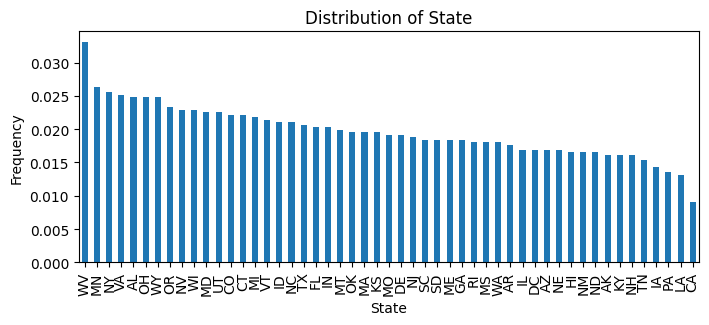

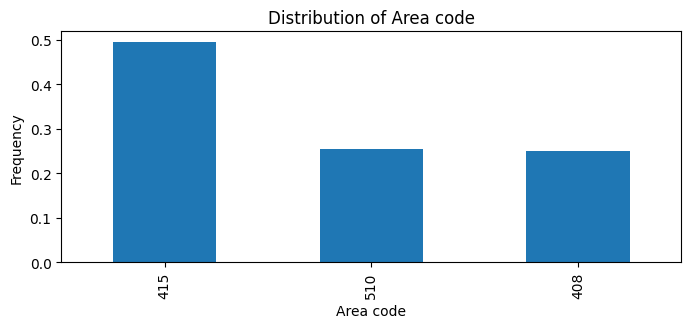

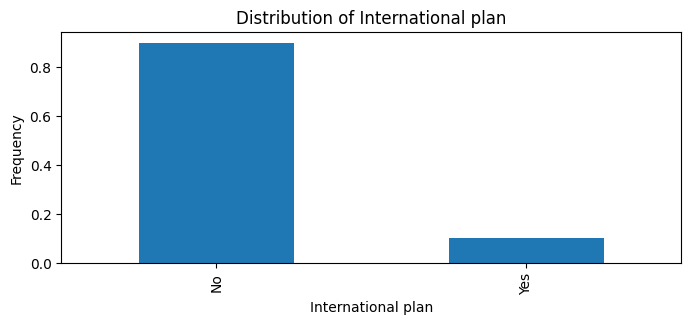

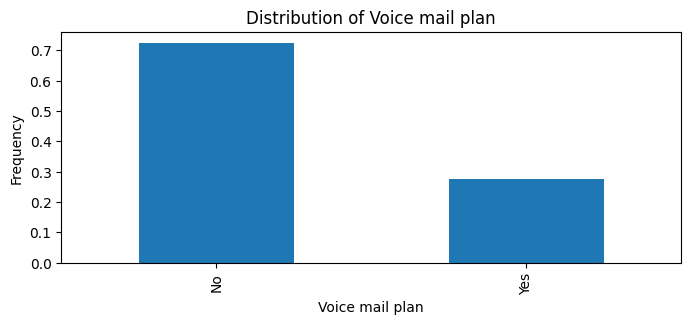

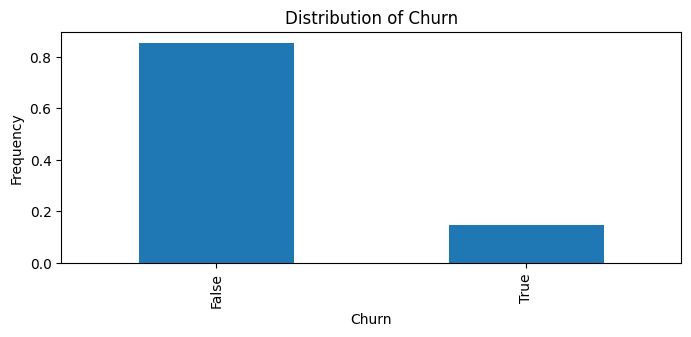

In [129]:
for var in categorical_features:
    plt.figure(figsize=(8, 3))
    df[var].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [130]:
# display the churn rate by each category in a table
churn_rate_tables = {}
for var in categorical_features[:-1]:  # Exclude 'Churn' from the loop
    churn_rate = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    churn_rate_tables[var] = churn_rate

for var, table in churn_rate_tables.items():
    print(f'Churn rate by {var}:')
    display(table)
    print('\n')

Churn rate by State:


Churn,False,True
State,,
AK,93.023256,6.976744
AL,89.393939,10.606061
AR,76.595745,23.404255
AZ,93.333333,6.666667
CA,79.166667,20.833333
CO,88.135593,11.864407
CT,81.355932,18.644068
DC,88.888889,11.111111
DE,84.313725,15.686275




Churn rate by Area code:


Churn,False,True
Area code,,
408,85.949178,14.050822
415,85.204856,14.795144
510,85.419735,14.580265




Churn rate by International plan:


Churn,False,True
International plan,,
No,88.731219,11.268781
Yes,56.296296,43.703704




Churn rate by Voice mail plan:


Churn,False,True
Voice mail plan,,
No,83.290222,16.709778
Yes,91.132333,8.867667


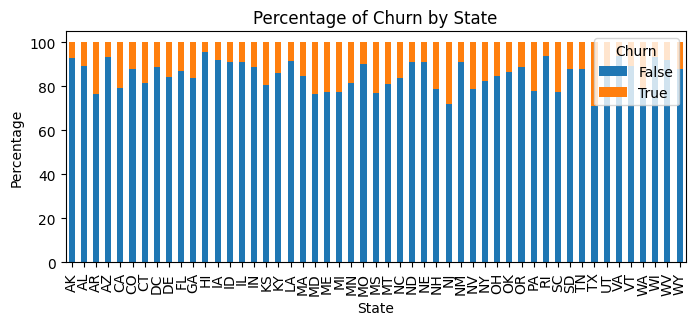

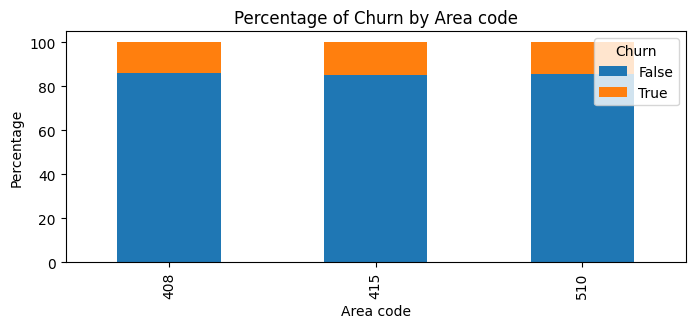

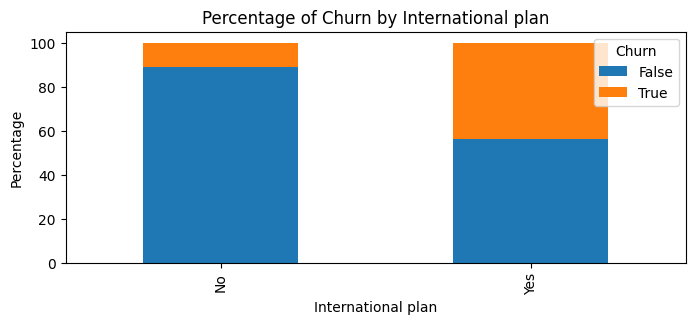

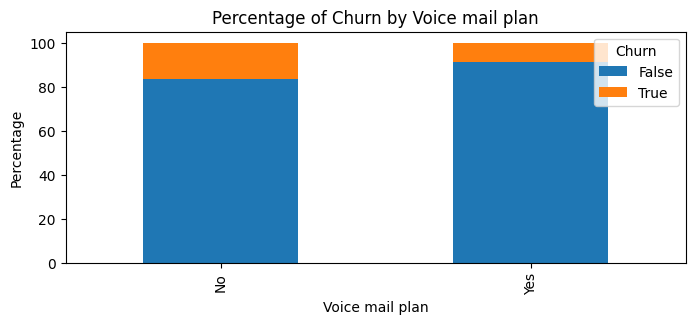

In [131]:
# examine the percentage of churn by each category
for var in categorical_features[:-1]:
    churn_percentage = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    churn_percentage.plot(kind='bar', stacked=True, figsize=(8, 3))
    plt.title(f'Percentage of Churn by {var}')
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

### Observation
- Churn rate somewhat uniform across different states and area codes.
- Churn rate varies a lot with the international plan and voice mail plan.
  - With **international plan**, the churn rate is almost **4 times** of the churn rate without it.
  - With **voice mail plan**, the churn rate is almost **2 times** of the churn rate without it.

In [132]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


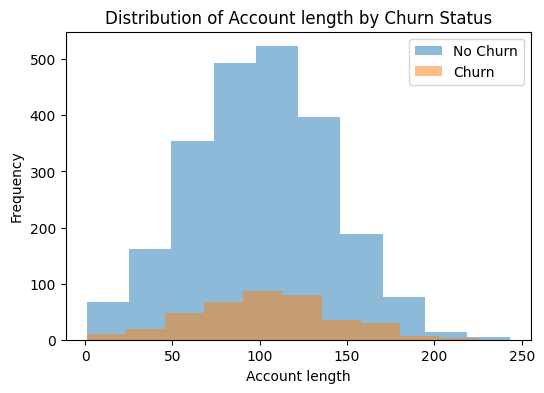

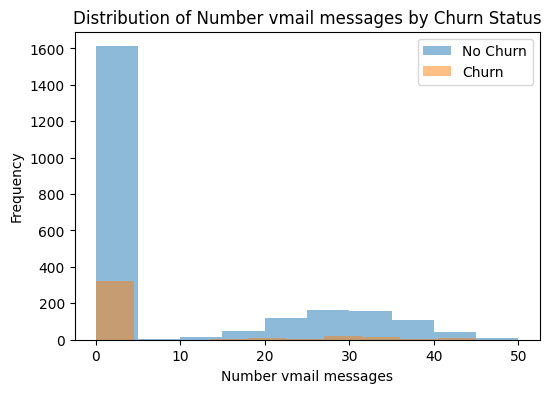

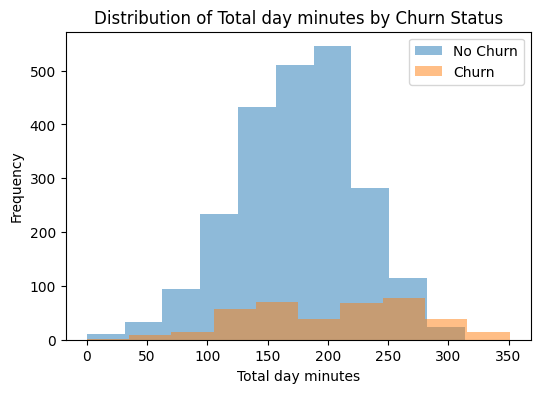

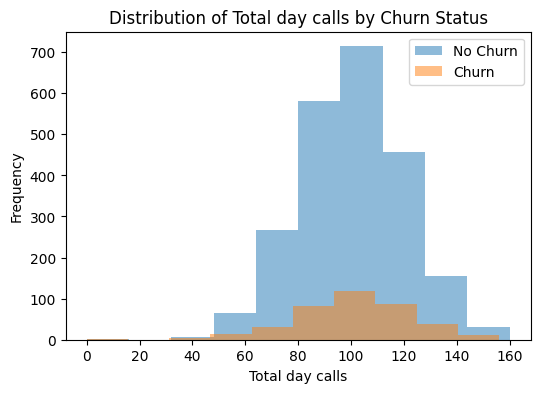

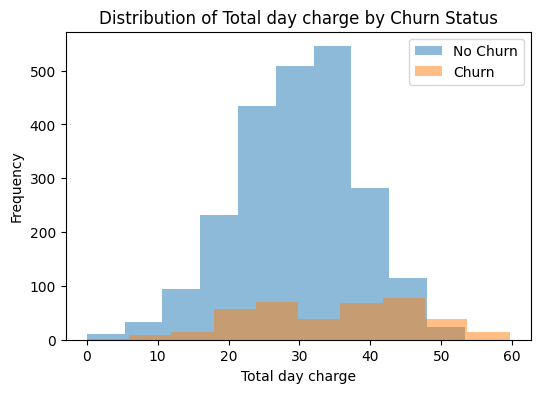

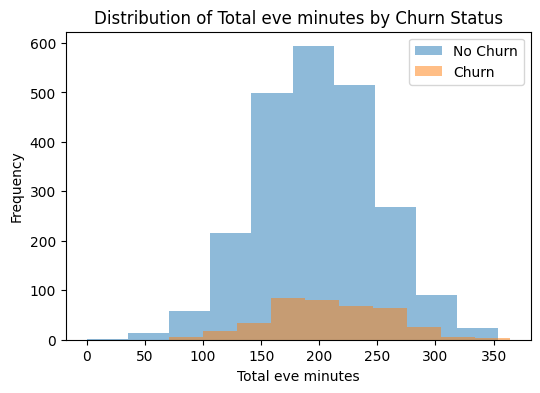

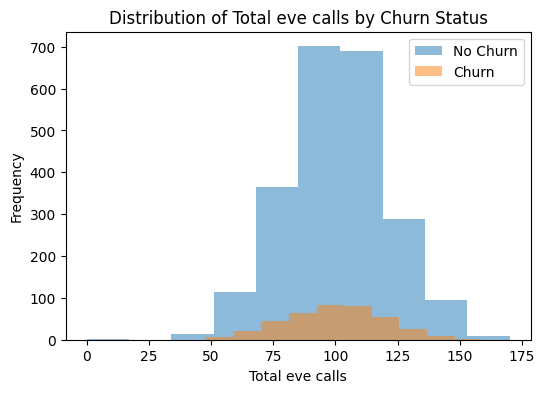

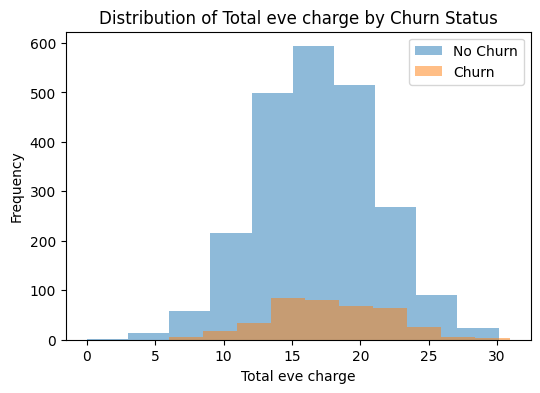

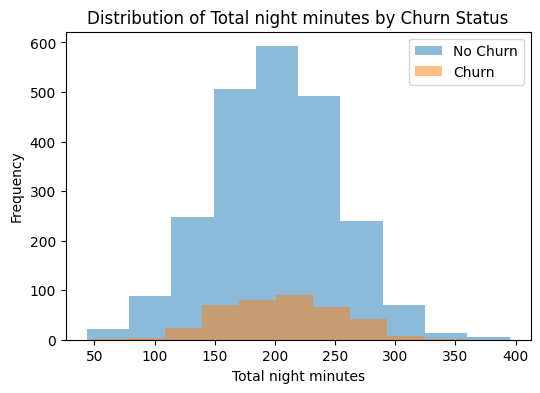

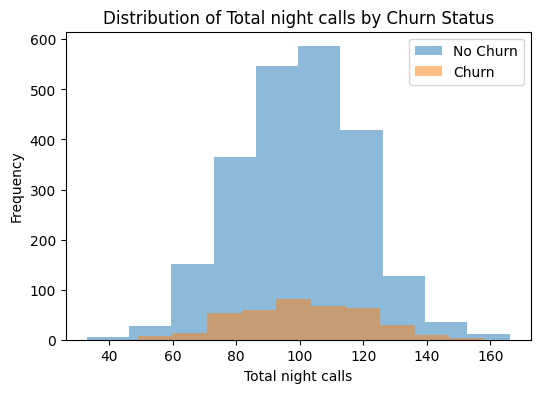

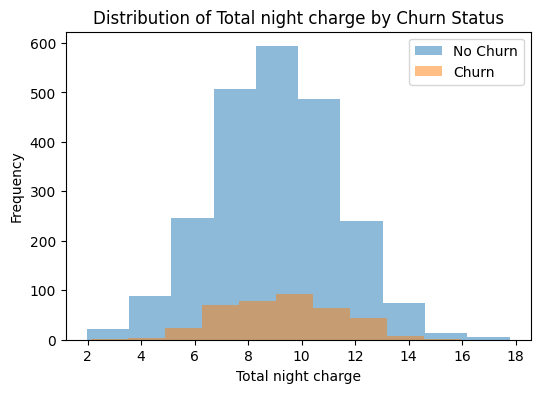

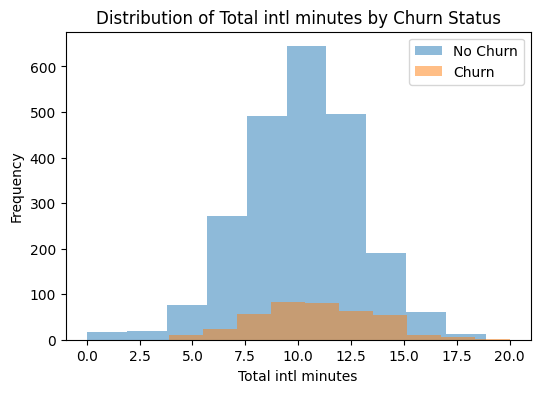

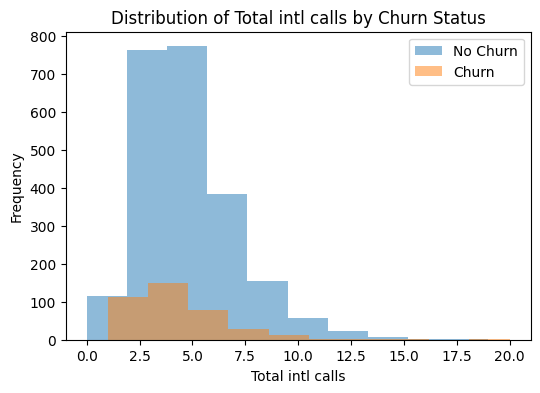

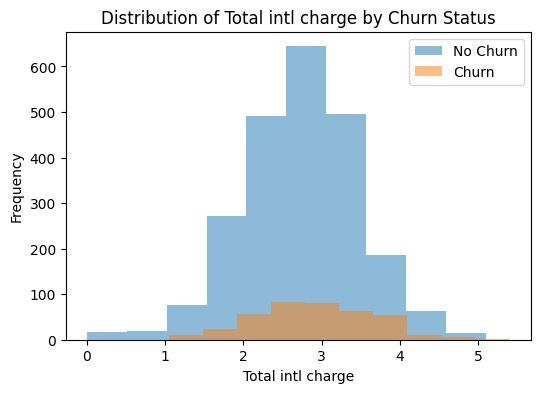

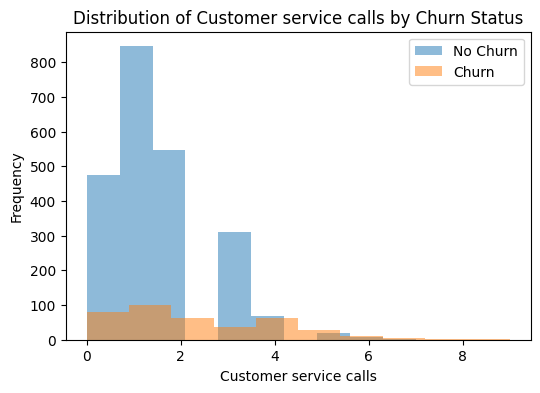

In [133]:
# Plot the distribution of numerical features by churn status
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    df[df['Churn'] == False][feature].plot(kind='hist', alpha=0.5, label='No Churn', bins=10)
    df[df['Churn'] == True][feature].plot(kind='hist', alpha=0.5, label='Churn', bins=10)
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# (Optional) Numerical encoding and normalization

In [134]:
test_df = pd.read_csv('data/churn-bigml-20.csv')

# One-hot encoding for State and Area code, the other ones are fine since they're binary
df_encoded = pd.get_dummies(df, columns=['State', 'Area code'], drop_first=False)
test_df_encoded = pd.get_dummies(test_df, columns=['State', 'Area code'], drop_first=False)
binary_categorical_features = ['International plan', 'Voice mail plan', 'Churn']

label_encoders = {}
for column in binary_categorical_features:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])
    test_df_encoded[column] = label_encoders[column].transform(test_df_encoded[column])


# Normalize numerical features
numerical_cols = df_encoded.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
# Another choice is StandardScaler
# scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
test_df_encoded[numerical_cols] = scaler.transform(test_df_encoded[numerical_cols])

display(df_encoded.head())

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
0,0.524793,0.0,1.0,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,...,False,False,False,False,False,False,False,False,True,False
1,0.438017,0.0,1.0,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,...,False,False,False,False,False,False,False,False,True,False
2,0.561983,0.0,0.0,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,...,False,False,False,False,False,False,False,False,True,False
3,0.342975,1.0,0.0,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,...,False,False,False,False,False,False,False,True,False,False
4,0.305785,1.0,0.0,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,...,False,False,False,False,False,False,False,False,True,False


# Correlation Analysis

In [135]:
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlation with the target variable 'Churn'
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Display the correlation with 'Churn'
print("Correlation with Churn:")
print(churn_correlation)

Correlation with Churn:
Churn                     1.000000
International plan        0.277489
Customer service calls    0.202590
Total day charge          0.195689
Total day minutes         0.195688
                            ...   
State_HI                 -0.036765
State_VA                 -0.039081
Total intl calls         -0.069882
Number vmail messages    -0.086474
Voice mail plan          -0.099291
Name: Churn, Length: 72, dtype: float64


In [136]:
# Compute the correlation matrix for the input features
input_features = df_encoded
correlation_matrix = input_features.corr()
# Display the correlation matrix
print("Correlation Matrix (between input features):")
display(correlation_matrix)

Correlation Matrix (between input features):


,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
Account length,1.000000,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,...,-0.002763,0.021230,0.012432,0.008645,-0.014259,-0.028746,0.019166,0.003433,0.004520,-0.008603
International plan,0.024500,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,...,-0.009024,0.009647,-0.006642,-0.017403,-0.001478,-0.027226,0.018530,-0.027969,-0.016116,0.046326
Voice mail plan,0.002448,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,...,0.008515,-0.018363,-0.015517,-0.039155,0.001283,0.003785,-0.011604,-0.013443,0.006090,0.006389
Number vmail messages,-0.002996,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,...,0.012765,-0.016104,-0.016241,-0.038355,0.001967,0.013126,-0.011607,-0.013194,0.012807,-0.001567
Total day minutes,0.002847,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,...,0.011441,-0.001210,0.009906,-0.010041,-0.010464,-0.025461,0.001337,-0.019979,0.039307,-0.025226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State_WV,-0.028746,-0.027226,0.003785,0.013126,-0.025461,0.038735,-0.025457,-0.052365,-0.006049,-0.052381,...,-0.028034,-0.029664,-0.027309,-0.025017,-0.028272,1.000000,-0.029436,-0.034298,0.010478,0.022106
State_WY,0.019166,0.018530,-0.011604,-0.011607,0.001337,0.008157,0.001329,0.030424,-0.006773,0.030416,...,-0.024175,-0.025581,-0.023550,-0.021574,-0.024381,-0.029436,1.000000,-0.008697,0.011450,-0.004485
Area code_408,0.003433,-0.027969,-0.013443,-0.013194,-0.019979,0.013484,-0.019984,0.008000,-0.013211,0.007983,...,-0.023660,0.028671,-0.001815,0.038747,0.009795,-0.034298,-0.008697,1.000000,-0.572317,-0.338345
Area code_415,0.004520,-0.016116,0.006090,0.012807,0.039307,-0.003936,0.039309,-0.008057,0.028950,-0.008065,...,0.011824,-0.024555,-0.006117,-0.032330,-0.005804,0.010478,0.011450,-0.572317,1.000000,-0.578028


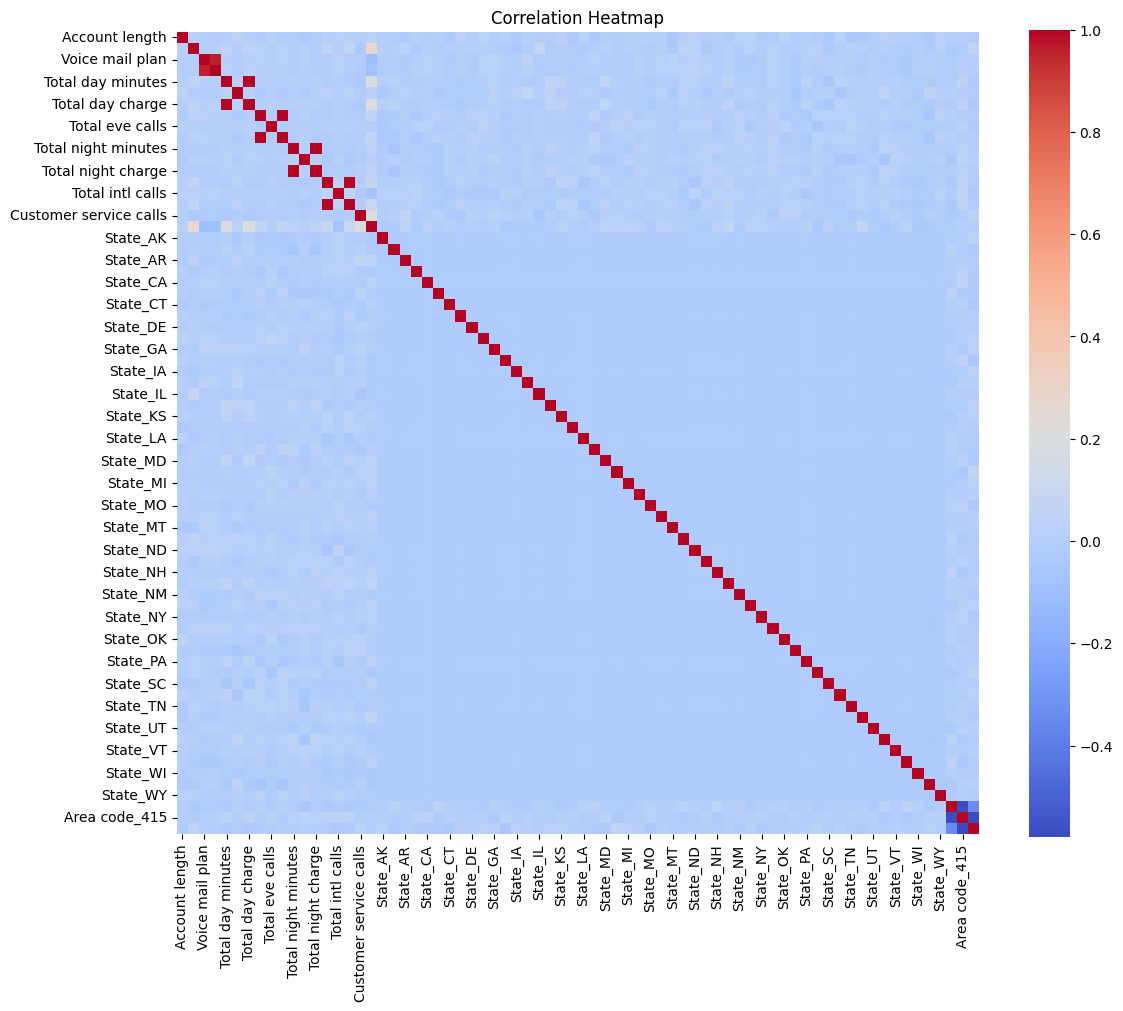

In [137]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [138]:
# Compute the correlation matrix for the input features
input_features = df_encoded
correlation_matrix = input_features.corr()

# Set the diagonal values to NaN to exclude self-to-self correlations
np.fill_diagonal(correlation_matrix.values, np.nan)

# Mask the lower triangle of the correlation matrix
mask = np.tril(np.ones(correlation_matrix.shape)).astype(bool)
correlation_matrix = correlation_matrix.mask(mask)

# Find the pairs of features with the highest correlation values
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False).dropna()

# Display the top 10 highest correlated feature pairs
print("Top 10 highest correlated feature pairs:")
print(correlation_pairs.head(10))

Top 10 highest correlated feature pairs:
Total day charge       Total day minutes         1.000000
Total eve charge       Total eve minutes         1.000000
Total night charge     Total night minutes       0.999999
Total intl charge      Total intl minutes        0.999993
Number vmail messages  Voice mail plan           0.957159
Churn                  International plan        0.277489
                       Customer service calls    0.202590
                       Total day charge          0.195689
                       Total day minutes         0.195688
                       Total intl charge         0.086216
dtype: float64


### Observation
There are highly correlated features:
- (Total day minutes, Total day charge)
- (Total eve minutes, Total eve charge)
- (Total night minutes, Total night charge)
- (Total intl minutes, Total intl charge)
- (Number vmail messages, Voice mail plan)


In [139]:
# Drop the high co-linearity features
df_encoded      =      df_encoded.drop(columns=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes','Number vmail messages'])
test_df_encoded = test_df_encoded.drop(columns=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes','Number vmail messages'])

# (???) Most significant features

In [140]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the feature matrix and target vector
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with 2 features to select
rfe = RFE(model, n_features_to_select=2)

# Fit RFE
rfe = rfe.fit(X, y)

# Get the selected features
selected_features_2 = X.columns[rfe.support_]
print("Most significant 2 features:", selected_features_2)

Most significant 2 features: Index(['Total day charge', 'Customer service calls'], dtype='object')


In [141]:
# Initialize RFE with 3 features to select
rfe = RFE(model, n_features_to_select=3)

# Fit RFE
rfe = rfe.fit(X, y)

# Get the selected features
selected_features_3 = X.columns[rfe.support_]
print("Most significant 3 features:", selected_features_3)

Most significant 3 features: Index(['International plan', 'Total day charge', 'Customer service calls'], dtype='object')


# Save encoded/pruned data

In [142]:
df_encoded.to_csv('encoded_train.csv', index=False)
test_df_encoded.to_csv('encoded_test.csv', index=False)